In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split


#### 1. Importing data set 

In [118]:
# importing data set to work up on...
tweets_data2 = pd.read_csv("/home/mdirfan-code/projects/Sentimeter-v1.0/BERT_Model/Datasets/twitter_training.csv",names=["S.No.","username","sentiment","tweet_text"])
tweets_data2

,S.No.,username,sentiment,tweet_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [119]:
tweets_data2.head()


,S.No.,username,sentiment,tweet_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### 2. Removing irrelavent column from data set

In [120]:
# Dropping Column S.No. and username
tweets_data2.drop(['S.No.','username'],axis=1,inplace=True)

In [121]:
tweets_data2

,sentiment,tweet_text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


#### 3. Visualizing the data 

In [122]:
tweets_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   74682 non-null  object
 1   tweet_text  73996 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [123]:
tweets_data2.describe()

,sentiment,tweet_text
count,74682,73996
unique,4,69491
top,Negative,"At the same time, despite the fact that there ..."
freq,22542,172


In [124]:
# checking for null entries
tweets_data2.isna().sum()

sentiment       0
tweet_text    686
dtype: int64

In [125]:
# classes in data set
classes = tweets_data2['sentiment'].unique()
classes

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [126]:
no_of_total_entries_in_dataframe = tweets_data2['sentiment'].count()

# Finding the no. of unique values in sentiment column
unique_classes = {}
for class_name in classes:
    unique_classes[class_name] = tweets_data2['sentiment'].value_counts()[class_name]
unique_classes


{'Positive': 20832, 'Neutral': 18318, 'Negative': 22542, 'Irrelevant': 12990}

In [127]:
# calulating percentage of occurance of particular value in sentiment column
percentage = {}

for class_name, no_of_entries in unique_classes.items():
    percentage[class_name] = (no_of_entries*100) / no_of_total_entries_in_dataframe
percentage



{'Positive': 27.89427171205913,
 'Neutral': 24.52799871454969,
 'Negative': 30.183980075520207,
 'Irrelevant': 17.393749497870974}

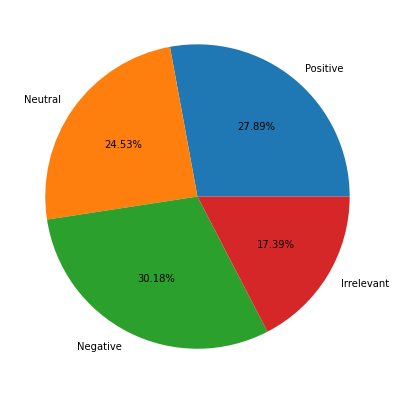

In [128]:
fig = plt.figure(figsize= (10,7))
fig.set_facecolor('white')
plt.pie(percentage.values(),autopct= lambda x: '{:.2f}%'.format(x), labels=percentage.keys())
plt.show()

#### 4. Creating deep copy of data set

In [129]:
tweets_data = tweets_data2.copy(deep=True)
tweets_data

,sentiment,tweet_text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


#### 4. Cleaning data


In [130]:
# Removing null entries those are present in tweet_text column
tweets_data.dropna(how='any',axis=0,inplace=True)


In [131]:
tweets_data.isna().sum()

sentiment     0
tweet_text    0
dtype: int64

In [132]:
def clean_tweet(tweet):
    tweet = re.sub(r"@[A-Za-z0-9_]+", ' ', tweet)
    # Delete URL links
    tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    # Just keep letters and important punctuation
    tweet = re.sub(r"[^a-zA-Z0-9.!?']", ' ', tweet)
    # Remove additional spaces
    tweet = re.sub(r" +", ' ', tweet)
    # remove multiple occuring dots 
    # tweet = re.sub(r"![ ][!?.]", ' ', tweet)
    return tweet

tweets_data['tweet_text'] =  tweets_data['tweet_text'].apply(str)
tweets_data['tweet_text'] =  tweets_data['tweet_text'].apply(clean_tweet)

tweets_data





,sentiment,tweet_text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


#### 5. Train and Dev set split

In [133]:
train_set, test_set = train_test_split(tweets_data, test_size=0.2, random_state=42, shuffle=True)
train_set

,sentiment,tweet_text
49647,Irrelevant,Last Weekend league for Fifa 20 Glad I could f...
43676,Positive,omg i'm so excited to watch dk play pubg
55915,Negative,all others who have problems with
14927,Positive,in
44039,Irrelevant,minho felix de jeongin sucked at pubg pretty h...
...,...,...
37541,Negative,you
6332,Neutral,I'm not even going to show a 7 2 loss.
55392,Negative,Fuck this call of duty update..
864,Positive,I should get up feed my dogs such that way whe...


In [134]:
test_set

,sentiment,tweet_text
61413,Irrelevant,Looks to me like he failed to check out the wa...
44887,Irrelevant,Wow it takes all sorts of crazy people out the...
73662,Neutral,Nvidia Unveils The World s Fastest Gaming Moni...
36694,Neutral,Huge radio play here. Reinvention Corporate Ev...
2308,Negative,SO I HAPPY WHO ABOUT THIS.
...,...,...
12630,Negative,where is all my Mamba Edition extras? I m bee...
49615,Negative,Sell 700k fifa coins fucking this game
12322,Negative,107 for a four game break and I can't even ev...
4355,Irrelevant,has called me a madman.. I understood right fr...


#### 5. Saving pre-processed data



In [135]:
tweets_data.to_csv('/home/mdirfan-code/projects/Sentimeter-v1.0/BERT_Model/Datasets/preprocessed_tweets.csv')

In [136]:
train_set.to_csv('/home/mdirfan-code/projects/Sentimeter-v1.0/BERT_Model/Datasets/Training_dataset.csv')

In [ ]:
test_set.to_csv('/home/mdirfan-code/projects/Sentimeter-v1.0/BERT_Model/Datasets/Testing_dataset.csv')